In [111]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
import os
os.chdir("/Users/hoangthuyduongvu/Desktop/FuzzSIM")


In [112]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.choquet.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *
from fuzz.choquet.d_choquet import *

In [113]:
# Load data 
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['target'] = iris_data.target
data, labels = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
data = batch_norm(np.array(data, dtype=np.float32))

# data, labels = dynamic_generate_positive_gaussian_data(
#     dim=3,
#     nb_classes=3,
#     nb_points_per_class=100,
#     seed=42
# )
# data = batch_norm(data)
# data[:5]

In [114]:
# features = data[0]

# mobius = generate_mobius(features, 2)
# mobius.pop(0)
# print(len(mobius))
# capacity = mobius_to_capacity(mobius, features)

# print("Möbius:")
# for i in range(len(mobius)):
#     print(f"Mobius of {mobius[i].X} is {mobius[i].mu:.3f}")

# print("\nDerived Capacity:")
# for c in capacity:
#     print(f"Capacity of {c.X} is {c.mu:.3f}")


In [115]:
# mutated_mobius = mutate(mobius, mutation_rate=0.2)
# print("\nMutated Möbius:")
# for i in range(len(mutated_mobius)):
#     print(f"Mobius of {mutated_mobius[i].X} is {mutated_mobius[i].mu:.3f}")

In [116]:
# Generate all possible mobius for training
features = list(range(len(data[0])))    # encode features as integers

nb_total = 10

# Input Mobius (10 mobius currently)
lst_mobius = []
for i in range(nb_total):
    mobius = generate_mobius(features, 2)
    mobius.pop(0)
    lst_mobius.append(mobius)

# Mutate all mobius
mutated = []
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    mutated_mobius = mutate(mobius, mutation_rate=0.2)
    mutated.append(mutated_mobius)

# Add mutated mobius to the list
lst_mobius.extend(mutated)

# Cross over all mobius
crossed_over = []
for i in range(len(lst_mobius)):
    for j in range(i + 1, len(lst_mobius) // 2):
        crossed = crossover(lst_mobius[i], lst_mobius[j])
        crossed_over.append(crossed)

# Add crossed over mobius to the list
lst_mobius.extend(crossed_over)
print(f"Total number of Möbius measures: {len(lst_mobius)}")

# Convert all Möbius measures to capacities
capacities_list = []
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    capacity = mobius_to_capacity(mobius, features)
    capacities_list.append(capacity)    
print('Test Möbius measures completed!')
print(f"Total number of capacities: {len(capacities_list)}")

Total number of Möbius measures: 65
Test Möbius measures completed!
Total number of capacities: 65


In [117]:
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    tmp = [mobius[j].mu for j in range(len(mobius))]
    print(f"Mobius {i + 1}: {tmp}")

Mobius 1: [0.28590678923916013, 0.8159469389686173, 0.861369996363436, 0.846514338690278, 0.9189265336395545, 0.2522410201733616, 0.7550419287462783, 0.46053949727414, 0.8419985528900615, 0.7284906771616132]
Mobius 2: [0.7764474464997246, 0.6561618376810715, 0.17742876946970687, 0.5450269188969383, 0.9846697395245082, 0.9373880664971189, 0.04317373579701167, 0.16481481572943713, 0.1317287734545619, 0.7259799099852955]
Mobius 3: [0.8177853298569451, 0.2135113663106719, 0.505852692951829, 0.8407030280112, 0.7328015447662506, 0.5422372054918483, 0.5903476904587729, 0.50836054691628, 0.2975484513188206, 0.5650219928590161]
Mobius 4: [0.6888853020500907, 0.8733229158608077, 0.6362913539792481, 0.761121537043158, 0.160071634954573, 0.4615574744197899, 0.009331619827093296, 0.24667886452162302, 0.7264617151130048, 0.9918099513493635]
Mobius 5: [0.0991780995872159, 0.40149431586128825, 0.8000709686991595, 0.20403563462889884, 0.5550849493022862, 0.7330712960296748, 0.615985450260179, 0.1880247

In [118]:
for i in range(len(capacities_list)):
    mobius = capacities_list[i]
    tmp = [mobius[j].mu for j in range(len(mobius))]
    print(f"Mobius {i + 1}: {tmp}")

# All different capacities

Mobius 1: [np.float64(0.0), np.float64(0.04225030171507008), np.float64(0.12057777447906126), np.float64(0.12729023445547227), np.float64(0.12509491751131363), np.float64(0.29862381369156354), np.float64(0.2068158287076735), np.float64(0.278922665085404), np.float64(0.3159249192419786), np.float64(0.370100282527581), np.float64(0.3600389470676339), np.float64(0.5312462509916119), np.float64(0.6597237675991036), np.float64(0.5511419871788554), np.float64(0.6731012223913463), np.float64(1.0)]
Mobius 2: [np.float64(0.0), np.float64(0.15097698236691048), np.float64(0.1275879451262383), np.float64(0.03450028758594167), np.float64(0.10597822157152756), np.float64(0.4700298702546995), np.float64(0.3677484876952599), np.float64(0.26535015761820574), np.float64(0.1941357893631344), np.float64(0.25918027979288977), np.float64(0.2816422885770466), np.float64(0.7188489322340034), np.float64(0.6100171586011187), np.float64(0.6232854423661326), np.float64(0.4668919034493633), np.float64(1.0)]
Mobius

In [119]:
mobius = generate_mobius(features, 2)
print("Möbius:")
for i in range(len(mobius)):
    print(f"Mobius of {mobius[i].X} is {mobius[i].mu:.3f}")

capacity = capacities_list[0]
print("\nDerived Capacity:")
for c in capacity:
    print(f"Capacity of {c.X} is {c.mu:.3f}")


Möbius:
Mobius of [] is 0.000
Mobius of [0] is 0.878
Mobius of [1] is 0.880
Mobius of [2] is 0.871
Mobius of [3] is 0.239
Mobius of [0, 1] is 0.451
Mobius of [0, 2] is 0.985
Mobius of [0, 3] is 0.772
Mobius of [1, 2] is 0.027
Mobius of [1, 3] is 0.065
Mobius of [2, 3] is 0.464

Derived Capacity:
Capacity of [] is 0.000
Capacity of [0] is 0.042
Capacity of [1] is 0.121
Capacity of [2] is 0.127
Capacity of [3] is 0.125
Capacity of [0, 1] is 0.299
Capacity of [0, 2] is 0.207
Capacity of [0, 3] is 0.279
Capacity of [1, 2] is 0.316
Capacity of [1, 3] is 0.370
Capacity of [2, 3] is 0.360
Capacity of [0, 1, 2] is 0.531
Capacity of [0, 1, 3] is 0.660
Capacity of [0, 2, 3] is 0.551
Capacity of [1, 2, 3] is 0.673
Capacity of [0, 1, 2, 3] is 1.000


In [120]:
import copy

In [121]:
# Fuzzy verion
def FuzzLOO(DS, mu, sim = S1, choquet_version='d_choquet', p=1, q=1, time_counter=False):
    """ Classifieur * tuple[array, array] -> float
    """
    ###################### A COMPLETER 
    pt = 0
    Xm, Ym = DS

    input_dimension= Xm[0].shape[0]

    C = KNNFuzz(input_dimension = input_dimension, mu=mu, sim=sim, choquet_version=choquet_version, p=p, q=q)

    if time_counter:
        tic = time.time()
    for i in range(len(Xm)):
        Xtest, Ytest = Xm[i], Ym[i]
        
        Xapp, Yapp = np.array(list(Xm[:i])+list(Xm[i+1:])), np.array(list(Ym[:i])+list(Ym[i+1:]))

        cl = copy.deepcopy(C)
        cl.train(desc_set=Xapp, label_set=Yapp)

        if cl.accuracy([Xtest], [Ytest]) == 1: pt += 1

    if time_counter:
        toc = time.time()
        print(f'Result in {(toc-tic):0.4f} seconds.')
    
    return pt/len(Xm)

In [122]:
FuzzLOO(
    DS=(data, labels),
    mu=capacities_list[0],
)

0.66

In [ ]:
def fitness_function(capacities_list: np.ndarray, DS: Tuple[np.ndarray, np.ndarray], sim = S1, choquet_version='d_choquet', p=1, q=1, time_counter=False, verbose=False) -> np.ndarray:
    """
    Objective function for optimizing Möbius measures:
    - capacities_list: list of Möbius measures represented as capacities
    - DS: Tuple (X_data, y_data)
    - C: Choquet similarity function (e.g., Choquet_classic)
    
    Returns:
    - 1D array of negative LOO accuracy (to minimize)
    """
    results = []
    i = 0
    # Replace capacities computation with Mobius instead
    # Isolate Classifier outside please
    for capacity in capacities_list:
        i += 1
        if not is_monotonic(capacity):
            results.append(float('inf'))  # Penalize non-monotonic capacity
            continue

        acc = FuzzLOO(DS, capacity, sim=sim, choquet_version=choquet_version, p=p, q=q, time_counter=time_counter)

        # negative accuracy for minimization
        results.append(-acc)

        if verbose: 
            print(f"Processing capacity {i}/{len(capacities_list)}...")
            tmp = [capacity[j].mu for j in range(len(capacity))]
            print(f"Capacities {i}: {tmp}")
            print(f"Accuracy: {acc:.4f}\n")

    return np.array(results)

In [124]:
FF_res = fitness_function(
    capacities_list=capacities_list,
    DS=(data, labels),
    sim=S1,
    choquet_version='d_choquet',
    p=1,
    q=1,
    time_counter=False, 
    verbose=True
)

Processing capacity 1/65...
Capacities 1: [np.float64(0.0), np.float64(0.04225030171507008), np.float64(0.12057777447906126), np.float64(0.12729023445547227), np.float64(0.12509491751131363), np.float64(0.29862381369156354), np.float64(0.2068158287076735), np.float64(0.278922665085404), np.float64(0.3159249192419786), np.float64(0.370100282527581), np.float64(0.3600389470676339), np.float64(0.5312462509916119), np.float64(0.6597237675991036), np.float64(0.5511419871788554), np.float64(0.6731012223913463), np.float64(1.0)]
Accuracy: 0.6600

Processing capacity 2/65...
Capacities 2: [np.float64(0.0), np.float64(0.15097698236691048), np.float64(0.1275879451262383), np.float64(0.03450028758594167), np.float64(0.10597822157152756), np.float64(0.4700298702546995), np.float64(0.3677484876952599), np.float64(0.26535015761820574), np.float64(0.1941357893631344), np.float64(0.25918027979288977), np.float64(0.2816422885770466), np.float64(0.7188489322340034), np.float64(0.6100171586011187), np.fl

In [125]:
# Get the best capacity
best_index = np.argmin(FF_res)
best_capacity = capacities_list[best_index]
print(f"Best capacity index: {best_index}, Accuracy: {-FF_res[best_index]:.4f}")

# get best mobius
best_mobius = lst_mobius[best_index]
print(f"Best Möbius measure: {[f'{m.X}: {m.mu:.3f}' for m in best_mobius]}")

Best capacity index: 1, Accuracy: 0.6667
Best Möbius measure: ['[0]: 0.776', '[1]: 0.656', '[2]: 0.177', '[3]: 0.545', '[0, 1]: 0.985', '[0, 2]: 0.937', '[0, 3]: 0.043', '[1, 2]: 0.165', '[1, 3]: 0.132', '[2, 3]: 0.726']


In [126]:
# get mobius
for i in range(len(capacities_list[best_index])):
    print(capacities_list[best_index][i].X, capacities_list[best_index][i].mu)

[] 0.0
[0] 0.15097698236691048
[1] 0.1275879451262383
[2] 0.03450028758594167
[3] 0.10597822157152756
[0, 1] 0.4700298702546995
[0, 2] 0.3677484876952599
[0, 3] 0.26535015761820574
[1, 2] 0.1941357893631344
[1, 3] 0.25918027979288977
[2, 3] 0.2816422885770466
[0, 1, 2] 0.7188489322340034
[0, 1, 3] 0.6100171586011187
[0, 2, 3] 0.6232854423661326
[1, 2, 3] 0.4668919034493633
[0, 1, 2, 3] 1.0


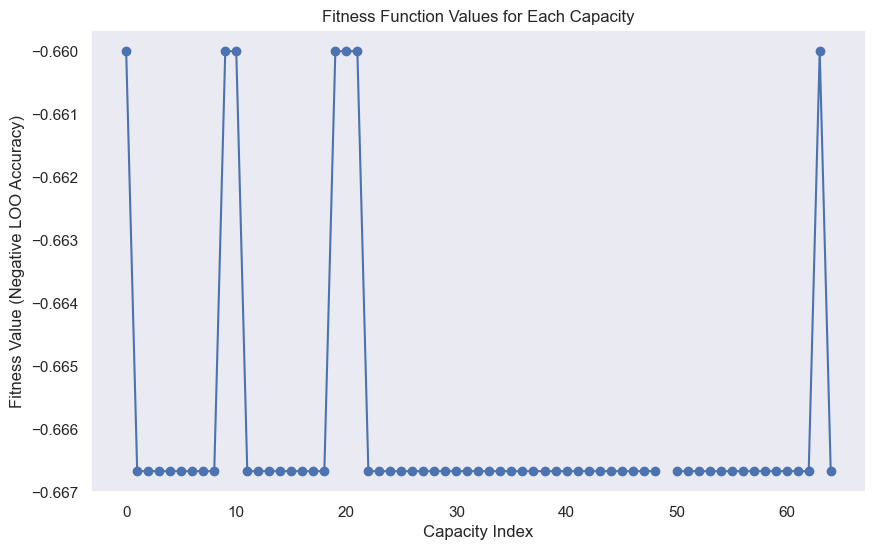

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(capacities_list)), FF_res, marker='o')
plt.title('Fitness Function Values for Each Capacity')
plt.xlabel('Capacity Index')
plt.ylabel('Fitness Value (Negative LOO Accuracy)')
plt.grid()
plt.show()